# An√°lisis Experimental de Algoritmos
# Objetivo de experimento
1. Comparar la eficiencia de los algoritmos para resolver el problema de inter√©s.

2. Comparar los resultados te√≥ricos con los resultados experimentales.
---
Considere el problema de calcular el coeficiente binomial, suponiendo que 0‚â§k‚â§n.

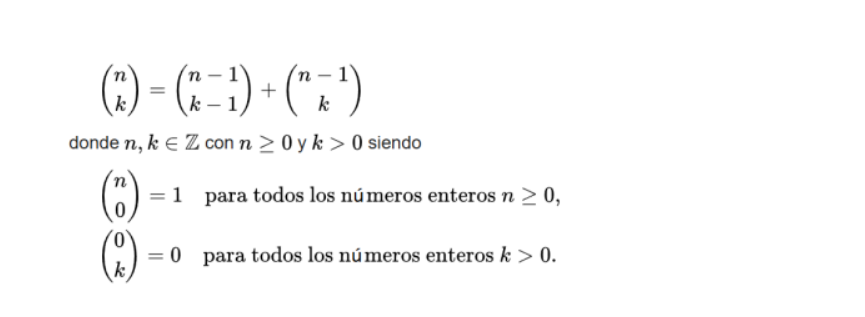
---
# Contexto del algoritmo
Los coeficientes binomiales, denotados como $\binom{n}{k}$ o C(n,k), representan el n√∫mero de formas de seleccionar k elementos de un conjunto de n elementos sin importar el orden. Formalmente, para enteros no negativos n y k con $0 \leq k \leq n$, el coeficiente binomial se define como:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

donde $n!$ denota el factorial de n. Por convenci√≥n, $\binom{n}{0} = \binom{n}{n} = 1$ para $n \geq 0$. Estos coeficientes surgen de manera natural en el desarrollo del binomio de Newton, en combinatoria enumerativa y en teor√≠a de probabilidad, constituyendo un concepto fundamental en matem√°ticas discretas con aplicaciones en diversos campos algor√≠tmicos y computacionales.




## Importar librerias necesarias para la manipulaci√≥n de datos, arreglos, matrices, gr√°ficos, tiempo.

In [ ]:
from itertools import combinations

import math
import random
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Algoritmo de fuerza bruta con itertools


### An√°lisis de complejidad algor√≠tmica

1. **Complejidad temporal**:
   - La funci√≥n `brute_force_itertools` tiene una complejidad temporal de $O\binom{n}{k}$, es decir $O\left(\frac{n!}{k!(n-k)!}\right)$, debido a que genera todas las combinaciones posibles.
   - Esto explica por qu√© se han omitido los tama√±os 'L' en el c√≥digo, ya que los c√°lculos ser√≠an prohibitivamente lentos para valores grandes.

2. **Complejidad espacial**:
   - La funci√≥n utiliza $O(k)$ de espacio adicional para cada combinaci√≥n generada por `itertools.combinations`.
   - Aunque s√≥lo mantiene un contador y descarta las combinaciones espec√≠ficas, `itertools` debe generar temporalmente cada combinaci√≥n.

### Uso de memoria

- El enfoque actual es relativamente eficiente en memoria ya que no almacena todas las combinaciones, solo las cuenta.
- Sin embargo, `itertools.combinations` genera internamente todas las combinaciones, lo que puede consumir recursos temporales significativos para valores grandes de $n$ y $k$.

In [ ]:
"""Uso de la libreria de itertools encontrar todas las combinaciones posibles y guardarlas en un contador"""
def brute_force_itertools(n, k):
  count = 0
  for _ in combinations(range(n), k):
    count += 1
  return count

"""Funci√≥n para medir y registrar m√©tricas de rendimiento"""
def results_brute_force_itertools():

  # diccionario donde se guardaran todos los resultados
  results = {}

  # Definimos tama√±os de las entradas seg√∫n el caso [ [valores n], [valores k] ]
  sizes = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    #'L': [[31, 40], [17, 20]] # Se omite el tama√±o L por la complejidad y cantidad de tiempo para calcular los coeficientes entre esos rangos
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinaci√≥n
  for size, ranges in sizes.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]

    results[size] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinaci√≥n en una tupla
        combination = (n, k)
        print(f"Size {size} Combinaci√≥n: {combination}")

        # Calculamos el tiempo de ejecuci√≥n de la funci√≥n 'binomial'
        start_time = time.time()
        result = brute_force_itertools(n, k) # Se invoca la funci√≥n que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las m√©tricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[size].append(dictionary)
        print(f"N√∫mero de combinaciones: {result}, Tiempo de ejecuci√≥n: {time_executed}")
        print()
  return results

In [ ]:
results_itertools = results_brute_force_itertools()

weights_keys = list(results_itertools.keys()) # Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])

# Asignamos el n√∫mero de filas
n_rows = len(results_itertools[weights_keys[0]])

# Creamos la lista de nombres de columnas.
field_names = []
for size in weights_keys:
  field_names.extend([
    f"{size}_Combination",
    f"{size}_Number_of_combinations",
    f"{size}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('itertools_results.csv', mode = 'w', newline = '') as file:
  writer_itertools = csv.DictWriter(file, fieldnames = field_names)
  writer_itertools.writeheader()

  # Recorremos el √≠ndice de cada fila
  for i in range(n_rows):
    row = {}
    # Para cada peso, obtenemos la fila correspondiente a la posici√≥n i
    for size in weights_keys:
      metric = results_itertools[size][i]
      row[f"{size}_Combination"] = metric["_Combination"]
      row[f"{size}_Number_of_combinations"] = metric["_Number_of_combinations"]
      row[f"{size}_Execution_time"] = metric["_Execution_time"]

    writer_itertools.writerow(row)

Size XS Combinaci√≥n: (1, 2)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-06

Size XS Combinaci√≥n: (1, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Size XS Combinaci√≥n: (1, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.1920928955078125e-06

Size XS Combinaci√≥n: (1, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 7.152557373046875e-07

Size XS Combinaci√≥n: (2, 2)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Size XS Combinaci√≥n: (2, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Size XS Combinaci√≥n: (2, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 3.0994415283203125e-06

Size XS Combinaci√≥n: (2, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 9.5367431640625e-07

Size XS Combinaci√≥n: (3, 2)
N√∫mero de combinaciones: 3, Tiempo de ejecuci√≥n: 1.430511474609375e-06

Size XS Combinaci√≥n: (3, 3)
N√∫mero de combinaciones: 1, Tiempo de eje

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('itertools_results.csv')
df.head()

XS_Combination  XS_Number_of_combinations  XS_Execution_time S_Combination  \
0         (1, 2)                          0                0.0       (11, 7)   
1         (1, 3)                          0                0.0       (11, 8)   
2         (1, 4)                          0                0.0       (11, 9)   
3         (1, 5)                          0                0.0      (11, 10)   
4         (2, 2)                          1                0.0       (12, 7)   

   S_Number_of_combinations  S_Execution_time M_Combination  \
0                       330            0.0000      (21, 12)   
1                       165            0.0000      (21, 13)   
2                        55            0.0000      (21, 14)   
3                        11            0.0000      (21, 15)   
4                       792            0.0001      (22, 12)   

   M_Number_of_combinations  M_Execution_time  
0                    293930            0.0238  
1                    203490            0.0168  
2                    116280            0.0099  
3                     54264            0.0056  
4                    646646            0.0541

## Algoritmo Divide y venceras con f√≥rmula recursiva


### An√°lisis de complejidad algor√≠tmica

1. **Complejidad temporal**:
   - La funci√≥n `divide_and_conquer_recursive` tiene una complejidad temporal de $O(2^n)$ debido a que cada llamada recursiva genera dos llamadas adicionales sin memorizaci√≥n.
   - Esta implementaci√≥n es significativamente menos eficiente que el enfoque de fuerza bruta para valores grandes de $n$ y $k$.
   - Al igual que en el algoritmo anterior, se omite el tama√±o 'L' en el c√≥digo porque los c√°lculos ser√≠an extremadamente lentos debido a la naturaleza exponencial del algoritmo.

2. **Complejidad espacial**:
   - La funci√≥n utiliza $O(n)$ de espacio adicional debido a la pila de llamadas recursivas, que puede alcanzar una profundidad m√°xima de $n$.
   - Cada llamada recursiva a√±ade un marco a la pila, lo que puede llevar a un desbordamiento de pila para valores grandes de $n$.

### Uso de memoria

- Este enfoque consume una cantidad significativa de memoria debido a la naturaleza de la recursi√≥n, especialmente para valores grandes de entrada.
- El algoritmo recalcula repetidamente los mismos subproblemas, lo que resulta en una gran cantidad de llamadas recursivas redundantes.
- Una misma combinaci√≥n $(n, k)$ puede ser calculada m√∫ltiples veces durante la ejecuci√≥n, lo que provoca un uso ineficiente tanto de CPU como de memoria.


In [ ]:
"""Funcion que calcula el numero de coeficientes binomiales (n, k) mediante una forma recursiva"""
def divide_and_conquer_recursive(n, k):
  # Definimos Casos base
  if (n == 0 and k == 0) or (n != 0 and k == 0) or (n == k):
    return 1
  if n == 0 and k != 0:
    return 0

  # Definimos la formula recursiva
  return divide_and_conquer_recursive(n - 1, k - 1) + divide_and_conquer_recursive(n - 1, k)

In [ ]:
"""Funcion donde se experimenta con diferentes tama√±os de entradas, tiempos de ejecuci√≥n  y n√∫mero de combinaciones"""
def results_divide_and_conquer():

  # diccionario donde se guardaran todos los resultados
  results = {}

  # Definimos tama√±os de las entradas seg√∫n el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    #'L': [[31, 40], [17, 20]] # Se omite el tama√±o L por la complejidad y cantidad de tiempo para calcular los coeficientes entre esos rangos
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinaci√≥n
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]

    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinaci√≥n en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinaci√≥n: {combination}")

        # Calculamos el tiempo de ejecuci√≥n de la funci√≥n 'binomial'
        start_time = time.time()
        result = divide_and_conquer_recursive(n, k) # Se invoca la funci√≥n que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las m√©tricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"N√∫mero de combinaciones: {result}, Tiempo de ejecuci√≥n: {time_executed}")
        print()
  return results

#### Se crea un archivo csv para manejarlo con pandas y poder graficar con matplotlib

In [ ]:
all_results = results_divide_and_conquer()

weights_keys = list(all_results.keys()) # Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])

# Asignamos el n√∫mero de filas
n_rows = len(all_results[weights_keys[0]])

# Creamos la lista de nombres de columnas.
field_names = []
for weight in weights_keys:
  field_names.extend([
    f"{weight}_Combination",
    f"{weight}_Number_of_combinations",
    f"{weight}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('divide_conquer_results.csv', mode = 'w', newline = '') as file:
  writer = csv.DictWriter(file, fieldnames = field_names)
  writer.writeheader()

  # Recorremos el √≠ndice de cada fila
  for i in range(n_rows):
    row = {}
    # Para cada peso, obtenemos la fila correspondiente a la posici√≥n i
    for weight in weights_keys:
      metric = all_results[weight][i]
      row[f"{weight}_Combination"] = metric["_Combination"]
      row[f"{weight}_Number_of_combinations"] = metric["_Number_of_combinations"]
      row[f"{weight}_Execution_time"] = metric["_Execution_time"]

    writer.writerow(row)

Weight XS Combinaci√≥n: (1, 2)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.291534423828125e-06

Weight XS Combinaci√≥n: (1, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Weight XS Combinaci√≥n: (1, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 3.337860107421875e-06

Weight XS Combinaci√≥n: (1, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.430511474609375e-06

Weight XS Combinaci√≥n: (2, 2)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Weight XS Combinaci√≥n: (2, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Weight XS Combinaci√≥n: (2, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.430511474609375e-06

Weight XS Combinaci√≥n: (2, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.1920928955078125e-06

Weight XS Combinaci√≥n: (3, 2)
N√∫mero de combinaciones: 3, Tiempo de ejecuci√≥n: 1.1920928955078125e-06

Weight XS Combinaci√≥n: (3, 3)
N√∫mero de combinacio

### Gr√°ficos comparativos entre los diferentes tama√±o de entrada (XS, S, M)
En las 3 categorias se tiene lo siguiente:
- Combinaciones.
- N√∫mero de combinaciones.
- Tiempo de ejecuci√≥n.

#### Creacion del dataframe usando el csv creado anteriormente

In [ ]:
# Creamos nuestro dataset con el conjunto de datos generado
df_2 = pd.read_csv('divide_conquer_results.csv')
df_2.head()

XS_Combination  XS_Number_of_combinations  XS_Execution_time S_Combination  \
0         (1, 2)                          0                0.0       (11, 7)   
1         (1, 3)                          0                0.0       (11, 8)   
2         (1, 4)                          0                0.0       (11, 9)   
3         (1, 5)                          0                0.0      (11, 10)   
4         (2, 2)                          1                0.0       (12, 7)   

   S_Number_of_combinations  S_Execution_time M_Combination  \
0                       330            0.0001      (21, 12)   
1                       165            0.0000      (21, 13)   
2                        55            0.0000      (21, 14)   
3                        11            0.0000      (21, 15)   
4                       792            0.0002      (22, 12)   

   M_Number_of_combinations  M_Execution_time  
0                    293930            0.0668  
1                    203490            0.0463  
2                    116280            0.0253  
3                     54264            0.0137  
4                    646646            0.1607

#### Gr√°fico individual y en conjunto para cada tama√±o (XS, S, M)


In [ ]:
"""Funci√≥n para crear visualizaciones las combinaciones y el numero de combinaciones"""
def metrics_combination_vs_number_combinations(df):
  figure, ax = plt.subplots(3, 1, figsize=(10, 12))

  # Primer subplot (XS)
  ax[0].plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'red', mec = 'darkolivegreen')
  ax[0].set_title('Combinaciones vs N√∫mero de combinaciones (XS)', fontsize = 10, fontweight = 'bold')
  ax[0].set_xlabel('Combinaciones', fontsize = 10)
  ax[0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0].set_xticks(range(len(df['XS_Combination'])))
  ax[0].set_xticklabels(df['XS_Combination'], rotation = 90, fontsize = 6)

  # Segundo subplot (S)
  ax[1].plot(df['S_Combination'], df['S_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'olive', mec = 'darkolivegreen')
  ax[1].set_title('Combinaciones vs N√∫mero de combinaciones (S)', fontsize = 10, fontweight = 'bold')
  ax[1].set_xlabel('Combinaciones', fontsize = 10)
  ax[1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1].set_xticks(range(len(df['S_Combination'])))
  ax[1].set_xticklabels(df['S_Combination'], rotation = 90, fontsize = 6)

  # Tercer subplot (M)
  ax[2].plot(df['M_Combination'], df['M_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'blue', mec = 'darkolivegreen')
  ax[2].set_title('Combinaciones vs N√∫mero de combinaciones (M)', fontsize = 10, fontweight = 'bold')
  ax[2].set_xlabel('Combinaciones', fontsize = 10)
  ax[2].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2].set_xticks(range(len(df['M_Combination'])))
  ax[2].set_xticklabels(df['M_Combination'], rotation = 90, fontsize = 6)

  # Escala logar√≠tmica y rejilla en cada eje
  for axis in ax:
      axis.set_yscale('log') # Colocamos el eje y en escala logar√≠tmica por la cantidad elevada de combinaciones mas que todo en el tama√±o M
      axis.grid(True)

  plt.subplots_adjust(hspace=0.5)
  plt.show()

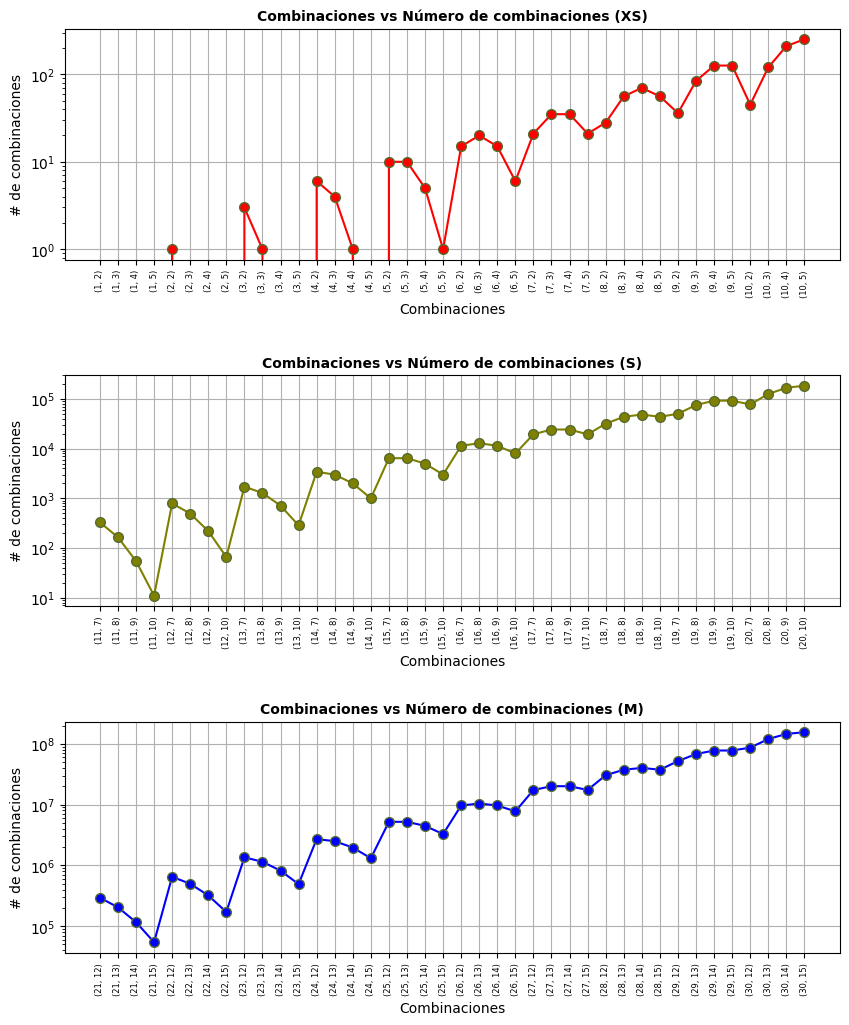

In [ ]:
"""Vizualizamos las m√©tricas de cada tama√±o (XS, S, M) en funci√≥n de las combinaciones y el n√∫mero de combinaciones"""
metrics_combination_vs_number_combinations(df_2)

In [ ]:
""" Gr√°fico general combinando los 3 tama√±os (XS, S, M) """
def metrics_combinated(df):
  plt.figure(figsize=(10, 6), dpi = 115)

  plt.plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs N√∫mero de combinaciones', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('N√∫mero de combinaciones', fontsize = 14)

  plt.xticks(range(0, 120, 3), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M'])
  plt.yscale('log')

  plt.show()

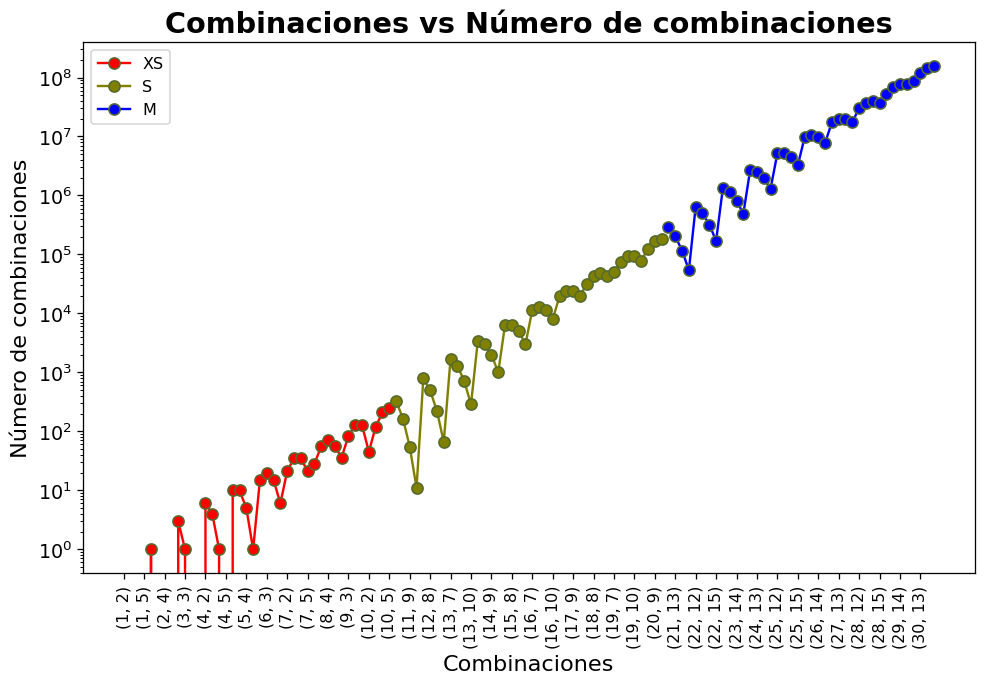

In [ ]:
metrics_combinated(df_2)

### Gr√°fico comparativo entre las combinaciones y el tiempo de ejecuci√≥n para cada tama√±o (XS, S, M)

In [ ]:
def metrics_combination_vs_time(df):
  figure, ax = plt.subplots(3, 1, figsize=(10, 12))

  # Primer subplot (XS)
  ax[0].plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize=7, linestyle='-', c='red', mec='darkolivegreen')

  ax[0].set_title('Combinaciones vs Tiempo de ejecuci√≥n (XS)', fontsize=10, fontweight='bold')
  ax[0].set_xlabel('Combinaciones', fontsize=10)
  ax[0].set_ylabel('Tiempo de ejecuci√≥n (segundos)', fontsize=10)

  ax[0].set_xticks(range(len(df['XS_Combination'])))
  ax[0].set_xticklabels(df['XS_Combination'], rotation=90, fontsize=6)

  # Segundo subplot (S)
  ax[1].plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize=7, linestyle='-', c='olive', mec='darkolivegreen')

  ax[1].set_title('Combinaciones vs Tiempo de ejecuci√≥n (S)', fontsize=10, fontweight='bold')
  ax[1].set_xlabel('Combinaciones', fontsize=10)
  ax[1].set_ylabel('Tiempo de ejecuci√≥n (segundos)', fontsize=10)

  ax[1].set_xticks(range(len(df['S_Combination'])))
  ax[1].set_xticklabels(df['S_Combination'], rotation=90, fontsize=6)

  # Tercer subplot (M)
  ax[2].plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize=7, linestyle='-', c='blue', mec='darkolivegreen')

  ax[2].set_title('Combinaciones vs Tiempo de ejecuci√≥n (M)', fontsize=10, fontweight='bold')
  ax[2].set_xlabel('Combinaciones', fontsize=10)
  ax[2].set_ylabel('Tiempo de ejecuci√≥n (segundos)', fontsize=10)

  ax[2].set_xticks(range(len(df['M_Combination'])))
  ax[2].set_xticklabels(df['M_Combination'], rotation=90, fontsize=6)

  #rejilla en cada eje
  for axis in ax:
    # Se omite la escala en eje y se deja por defecto 'lineal' ya que los tiempos de ejecuci√≥n no son n√∫meros grandes
      axis.grid(True)

  plt.subplots_adjust(hspace=0.5)
  plt.show()

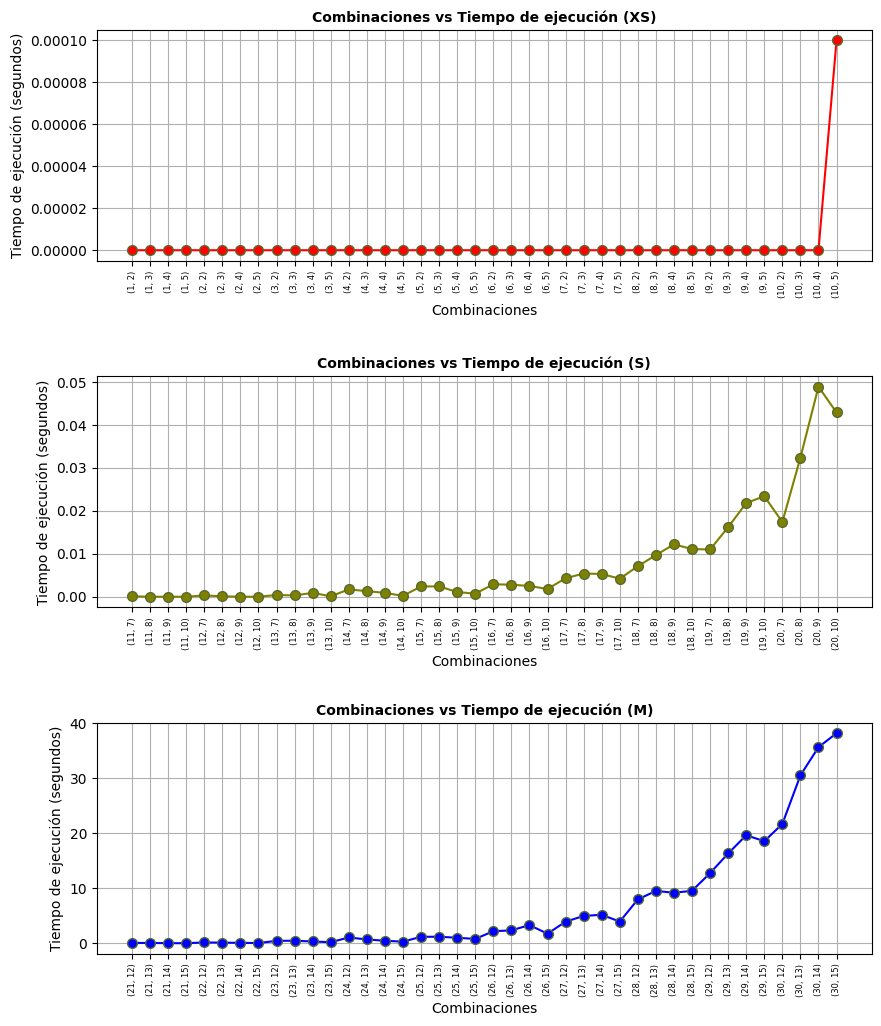

In [ ]:
metrics_combination_vs_time(df_2)

In [ ]:
def metrics_combinated_time(df):
  plt.figure(figsize=(10, 6), dpi = 115)
  plt.plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs Tiempo de ejecucion', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('Tiempo de ejecuion (segundos)', fontsize = 14)

  plt.xticks(range(0, 120, 5), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M'])

  plt.grid(True)
  plt.show()

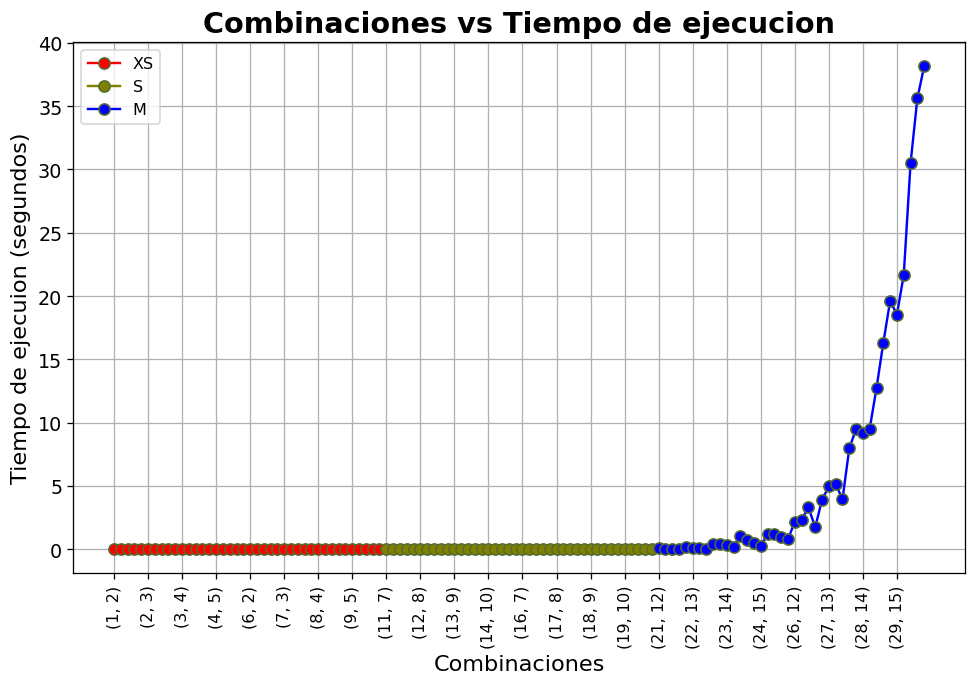

In [ ]:
metrics_combinated_time(df_2)

## Algoritmo Divide y venceras con memorizaci√≥n

### Complejidad Temporal: $\mathcal{O}(n \cdot k)$

La funci√≥n `divide_memo(n, k)` calcula el coeficiente binomial $\binom{n}{k}$ usando **memoizaci√≥n**, lo que mejora significativamente la eficiencia comparado con la versi√≥n puramente recursiva.

---

**1. Eliminaci√≥n de c√°lculos redundantes:**  
A diferencia del algoritmo anterior, cada subproblema $(n, k)$ se calcula exactamente una vez y se almacena en el diccionario `memo`.

**2. N√∫mero total de subproblemas:**  
Existen aproximadamente $n \cdot k$ posibles pares $(n, k)$ que podr√≠an calcularse durante la ejecuci√≥n.

**3. Rango de valores:**  
- El valor de $n$ puede variar desde $0$ hasta el $n$ original.  
- El valor de $k$ puede variar desde $0$ hasta el m√≠nimo entre $k$ original y $n$.

**4. Coste por subproblema:** Cada c√°lculo de un nuevo subproblema $(n,k)$ involucra:
- Verificar si el resultado ya existe en el diccionario: $\mathcal{O}(1)$  
- Realizar operaciones aritm√©ticas simples: $\mathcal{O}(1)$  
- Almacenar el resultado en el diccionario: $\mathcal{O}(1)$

---

### Complejidad Espacial: $\mathcal{O}(n \cdot k)$

La complejidad espacial incluye tanto la memoria para la pila de recursi√≥n como la memoria para almacenar resultados intermedios:

**1. Diccionario de memoizaci√≥n:**  
El diccionario `memo` almacena los resultados de todos los subproblemas calculados. En el peor caso, almacenar√° $\mathcal{O}(n \cdot k)$ entradas, una por cada par $(n,k)$ √∫nico.

**2. Pila de recursi√≥n:**  
Aunque la recursi√≥n sigue presente, la profundidad m√°xima de la pila es $\mathcal{O}(n)$ (similar al algoritmo anterior).  
Sin embargo, gracias a la memoizaci√≥n, muchas ramas del √°rbol de recursi√≥n se cortan temprano.


In [ ]:
memo = {}
# Funcion que calcula el numero de coeficientes binomiales (n, k)
def divide_memo(n, k):

  # Si el coeficiente binomial ya fue calculado, retornamos el valor guardado en el diccionario
  if (n, k) in memo:
    return memo[(n, k)]

  # Definimos Casos base
  if k > n:
    memo[(n, k)] = 0
    return 0

  if k == 0 or k == n:
    memo[(n, k)] = 1
    return 1

  # Definimos la formula recursiva y guardamos el resultado en la variable 'result'
  result = divide_memo(n - 1, k - 1) + divide_memo(n - 1, k)
  memo[(n, k)] = result

  return result

In [ ]:
memo = {}
# Funcion que calcula el numero de coeficientes binomiales (n, k)
def divide_memo(n, k):

  # Si el coeficiente binomial ya fue calculado, retornamos el valor guardado en el diccionario
  if (n, k) in memo:
    return memo[(n, k)]

  # Definimos Casos base
  if k > n:
    memo[(n, k)] = 0
    return 0

  if k == 0 or k == n:
    memo[(n, k)] = 1
    return 1

  # Definimos la formula recursiva y guardamos el resultado en la variable 'result'
  result = divide_memo(n - 1, k - 1) + divide_memo(n - 1, k)
  memo[(n, k)] = result

  return result

"""Funcion donde se experimenta con diferentes tama√±os de entradas, tiempos de ejecuci√≥n  y n√∫mero de combinaciones"""
def results_divide_memo():

  # diccionario donde se guardaran todos los resultados
  results = {}
  # Definimos tama√±os de las entradas seg√∫n el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    'L': [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL': [[51, 60], [32, 35]]
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinaci√≥n
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]


    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k

        # definimos la combinaci√≥n en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinaci√≥n: {combination}")

        # Calculamos el tiempo de ejecuci√≥n de la funci√≥n 'binomial'
        start_time = time.time()
        result = divide_memo(n, k) # Se invoca la funci√≥n que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las m√©tricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"N√∫mero de combinaciones: {result}, Tiempo de ejecuci√≥n: {time_executed}")
        print()
  return results

In [ ]:
all_results_memo = results_divide_memo()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_memo = list(all_results_memo.keys())

# Asignamos el n√∫mero de filas
n_rows_memo = len(all_results_memo[weights_keys_memo[0]])

# Creamos la lista de nombres de columnas.
field_names_memo = []
for weight_memo in weights_keys_memo:
  field_names_memo.extend([
    f"{weight_memo}_Combination",
    f"{weight_memo}_Number_of_combinations",
    f"{weight_memo}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('divide_results_memo.csv', mode = 'w', newline = '') as file:
  writer_memo = csv.DictWriter(file, fieldnames = field_names_memo)
  writer_memo.writeheader()

  # Recorremos el √≠ndice de cada registro (fila)
  for i in range(n_rows_memo):
    row_memo = {}
    # Para cada peso, obtenemos el registro correspondiente a la posici√≥n i
    for weight_memo in weights_keys_memo:
      metric_memo = all_results_memo[weight_memo][i]
      row_memo[f"{weight_memo}_Combination"] = metric_memo["_Combination"]
      row_memo[f"{weight_memo}_Number_of_combinations"] = metric_memo["_Number_of_combinations"]
      row_memo[f"{weight_memo}_Execution_time"] = metric_memo["_Execution_time"]

    writer_memo.writerow(row_memo)

Weight XS Combinaci√≥n: (1, 2)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-06

Weight XS Combinaci√≥n: (1, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.1920928955078125e-06

Weight XS Combinaci√≥n: (1, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.1920928955078125e-06

Weight XS Combinaci√≥n: (1, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 9.5367431640625e-07

Weight XS Combinaci√≥n: (2, 2)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Weight XS Combinaci√≥n: (2, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.430511474609375e-06

Weight XS Combinaci√≥n: (2, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.6689300537109375e-06

Weight XS Combinaci√≥n: (2, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 2.384185791015625e-06

Weight XS Combinaci√≥n: (3, 2)
N√∫mero de combinaciones: 3, Tiempo de ejecuci√≥n: 5.9604644775390625e-06

Weight XS Combinaci√≥n: (3, 3)
N√∫mero de combinacion

In [ ]:
df_3 = pd.read_csv('divide_results_memo.csv')
df_3.head()

XS_Combination  XS_Number_of_combinations  XS_Execution_time S_Combination  \
0         (1, 2)                          0                0.0       (11, 7)   
1         (1, 3)                          0                0.0       (11, 8)   
2         (1, 4)                          0                0.0       (11, 9)   
3         (1, 5)                          0                0.0      (11, 10)   
4         (2, 2)                          1                0.0       (12, 7)   

   S_Number_of_combinations  S_Execution_time M_Combination  \
0                       330               0.0      (21, 12)   
1                       165               0.0      (21, 13)   
2                        55               0.0      (21, 14)   
3                        11               0.0      (21, 15)   
4                       792               0.0      (22, 12)   

   M_Number_of_combinations  M_Execution_time L_Combination  \
0                    293930               0.0      (31, 17)   
1                    203490               0.0      (31, 18)   
2                    116280               0.0      (31, 19)   
3                     54264               0.0      (31, 20)   
4                    646646               0.0      (32, 17)   

   L_Number_of_combinations  L_Execution_time XL_Combination  \
0                 265182525               0.0       (41, 22)   
1                 206253075               0.0       (41, 23)   
2                 141120525               0.0       (41, 24)   
3                  84672315               0.0       (41, 25)   
4                 565722720               0.0       (42, 22)   

   XL_Number_of_combinations  XL_Execution_time XXL_Combination  \
0               244662670200                0.0        (51, 32)   
1               202112640600                0.0        (51, 33)   
2               151584480450                0.0        (51, 34)   
3               103077446706                0.0        (51, 35)   
4               513791607420                0.0        (52, 32)   

   XXL_Number_of_combinations  XXL_Execution_time  
0              48459472266975                 0.0  
1              27900908274925                 0.0  
2              14771069086725                 0.0  
3               7174519270695                 0.0  
4             125994627894135                 0.0

In [ ]:
def metrics_combination_vs_number_combinations_memo(df):
  """Funci√≥n para crear visualizaciones de las m√©tricas"""
  figure, ax = plt.subplots(3, 2, figsize = (14, 18))
  # Primer subplot (XS)
  ax[0,0].plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'red', mec = 'darkolivegreen')

  ax[0,0].set_title('Combinaciones vs N√∫mero de combinaciones (XS)', fontsize=10, fontweight='bold')
  ax[0,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[0,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0,0].set_xticks(range(len(df['XS_Combination'])))
  ax[0,0].set_xticklabels(df['XS_Combination'], rotation = 90, fontsize = 6)

  # Segundo subplot (S)
  ax[0,1].plot(df['S_Combination'], df['S_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )

  ax[0,1].set_title('Combinaciones vs N√∫mero de combinaciones (S)', fontsize=10, fontweight='bold')
  ax[0,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[0,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0,1].set_xticks(range(len(df['S_Combination'])))
  ax[0,1].set_xticklabels(df['S_Combination'], rotation = 90, fontsize = 6)

  # Tercer subplot (M)
  ax[1,0].plot(df['M_Combination'], df['M_Number_of_combinations'], marker =  'o', markersize = 7,  linestyle = '-', c = 'blue', mec = 'darkolivegreen' )

  ax[1,0].set_title('Combinaciones vs N√∫mero de combinaciones (M)', fontsize = 10, fontweight = 'bold')
  ax[1,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[1,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1,0].set_xticks(range(len(df['M_Combination'])))
  ax[1,0].set_xticklabels(df['M_Combination'], rotation = 90, fontsize = 6)

  # Cuarto subplot (L)
  ax[1,1].plot(df['L_Combination'], df['L_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'purple', mec = 'darkolivegreen' )

  ax[1,1].set_title('Combinaciones vs N√∫mero de combinaciones (L)', fontsize = 10, fontweight='bold')
  ax[1,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[1,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1,1].set_xticks(range(len(df['L_Combination'])))
  ax[1,1].set_xticklabels(df['L_Combination'], rotation = 90, fontsize = 6)

  # Quinto subplot (XL)
  ax[2,0].plot(df['XL_Combination'], df['XL_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'green', mec = 'darkolivegreen' )

  ax[2,0].set_title('Combinaciones vs N√∫mero de combinaciones (XL)', fontsize = 10, fontweight = 'bold')
  ax[2,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[2,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2,0].set_xticks(range(len(df['XL_Combination'])))
  ax[2,0].set_xticklabels(df['XL_Combination'], rotation = 90, fontsize = 6)

  # Sexto subplot (XXL)
  ax[2,1].plot(df['XXL_Combination'], df['XXL_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'yellow', mec = 'darkolivegreen' )

  ax[2,1].set_title('Combinaciones vs N√∫mero de combinaciones (XXL)', fontsize = 10, fontweight = 'bold')
  ax[2,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[2,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2,1].set_xticks(range(len(df['XXL_Combination'])))
  ax[2,1].set_xticklabels(df['XXL_Combination'], rotation = 90, fontsize = 6)

  # Escala logar√≠tmica y rejilla en cada eje
  for axis in ax:
    for axs in axis:
      axs.set_yscale('log')
      axs.grid(True)

  plt.subplots_adjust(hspace = 0.3)
  plt.show()

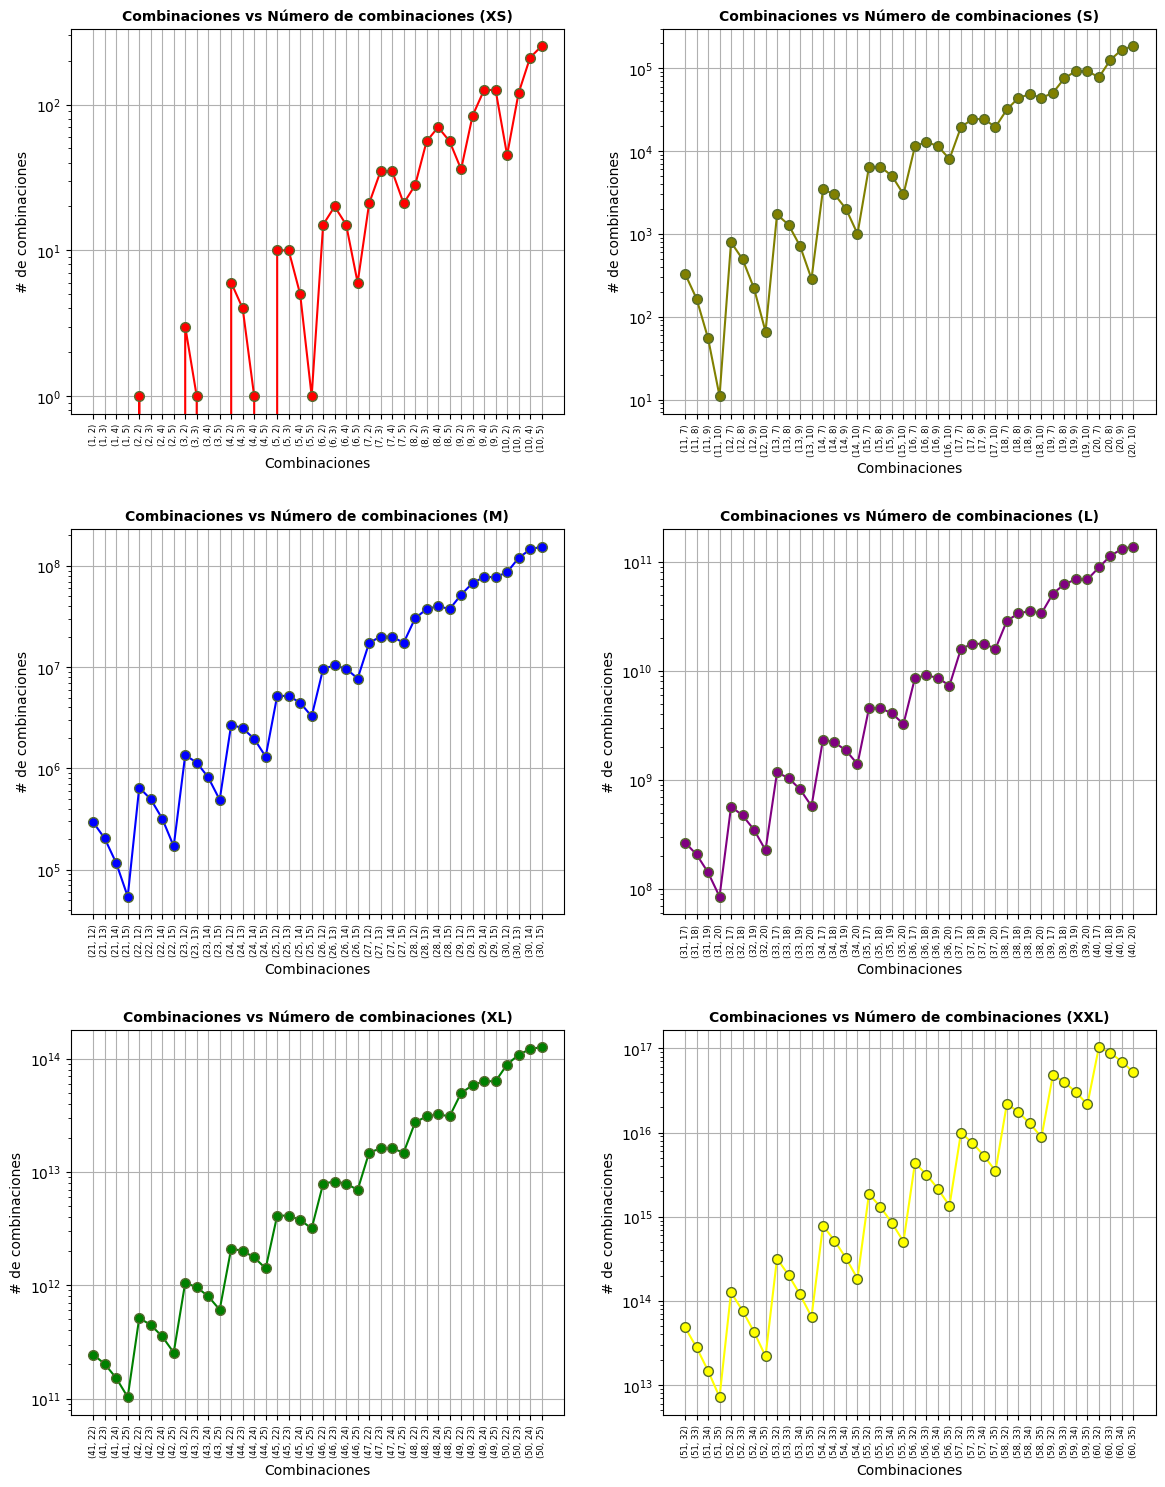

In [ ]:
metrics_combination_vs_number_combinations_memo(df_3)

In [ ]:
def metrics_combinated_memo(df):
  plt.figure(figsize=(10, 6), dpi = 115)

  plt.plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )
  plt.plot(df['L_Combination'], df['L_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )
  plt.plot(df['XL_Combination'], df['XL_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'green', mec = 'darkolivegreen' )
  plt.plot(df['XXL_Combination'], df['XXL_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'yellow', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs Tiempo de ejecucion', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('Tiempo de ejecuion (segundos)', fontsize = 14)

  plt.xticks(range(0, 240, 10), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M', 'L', 'XL', 'XXL'])

  plt.grid(True)
  plt.show()

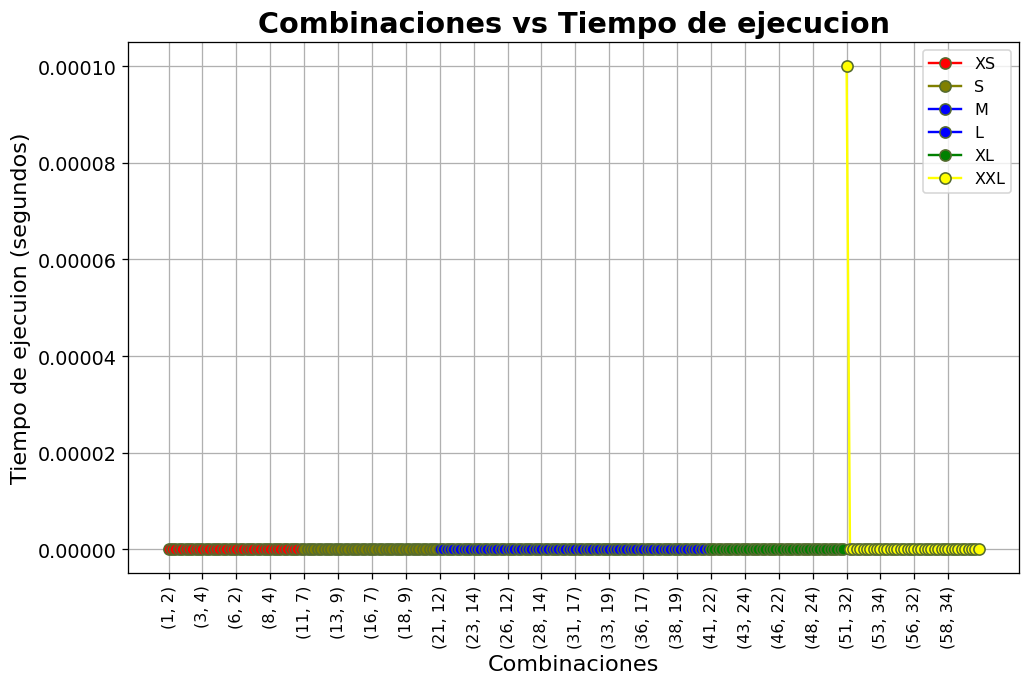

In [ ]:
metrics_combinated_memo(df_3)

## Realizamos una comparativa entre el algoritmo de divide y venceras original y su modificaci√≥n con memorizaci√≥n

In [ ]:
""" Hacemos una copia respectiva de cada dataframe """
df_divide = df_2.copy()
df_divide_memo = df_3.copy()

In [ ]:
def compare_time_metric(df1, df2):
  plt.figure(figsize=(10, 6), dpi = 105)
  plt.scatter(df1['M_Combination'], df1['M_Execution_time'], label='Algoritmo recursivo DV', alpha=0.6, s = 50)
  plt.scatter(df2['M_Combination'], df2['M_Execution_time'], label='Algoritmo recursivo Memorizaci√≥n', alpha=0.6, s = 50)

  plt.title('Combinaciones vs Tiempo de ejecuci√≥n (M)', fontsize = 14, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 12, fontweight = 'bold')
  plt.ylabel('Tiempo (segundos)', fontsize = 12, fontweight = 'bold')

  plt.xticks(range(len(df['M_Combination'])), rotation=90, fontsize = 10)
  plt.legend()

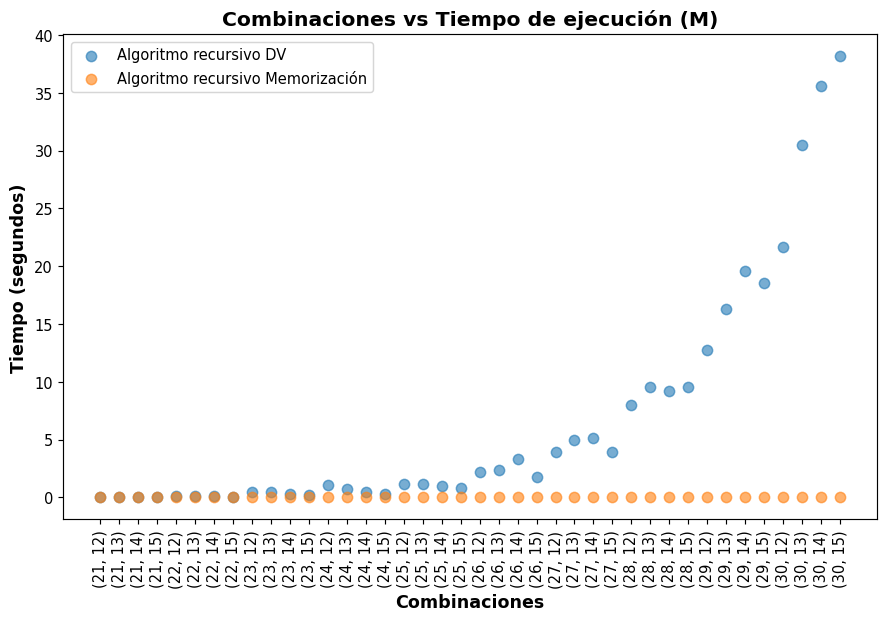

In [ ]:
compare_time_metric(df_divide, df_divide_memo)

## Algoritmo con f√≥rmula general


### M√©todo de la F√≥rmula Factorial (`binomial_formule`)

---

### Complejidad Temporal: $\mathcal{O}(n)$

El algoritmo `binomial_formule` utiliza directamente la f√≥rmula matem√°tica:

\begin{equation}
\binom{n}{k} = \frac{n!}{k!(n-k)!}
\end{equation}


---

**1. C√°lculo de factoriales:**  
La operaci√≥n dominante es el c√°lculo de los factoriales:

\[
n!, \quad k!, \quad (n-k)!
\]

- El c√°lculo de $n!$ requiere $n$ multiplicaciones.  
- El c√°lculo de $k!$ requiere $k$ multiplicaciones.  
- El c√°lculo de $(n-k)!$ requiere $(n-k)$ multiplicaciones.

---

**2. Operaci√≥n del factorial en Python:**  
La funci√≥n `math.factorial()` tiene una complejidad de $\mathcal{O}(n)$ para calcular $n!$.

---

### Complejidad Espacial: $\mathcal{O}(1)$

**1. Variables constantes:**  
El algoritmo solo utiliza un n√∫mero constante de variables ($n$, $k$, y el resultado).

**2. Sin estructuras auxiliares:**  
No se emplean estructuras de datos adicionales que crezcan con el tama√±o de la entrada.

---

### Resumen de la Complejidad Temporal: $\mathcal{O}(n)$

Esta complejidad se deriva del c√°lculo de los factoriales:

- $n!$ requiere $n$ multiplicaciones.  
- $k!$ requiere $k$ multiplicaciones.  
- $(n-k)!$ requiere $(n-k)$ multiplicaciones.

**Implementaci√≥n de `math.factorial()`:**  
La funci√≥n integrada en Python tiene una complejidad de $\mathcal{O}(n)$ para calcular el factorial de $n$.


In [ ]:
def general_formule(n, k):
    if k > n:
        return 0
    # 2. Si k = 0 o k = n, se cumple que C(n, k) = 1
    if k == 0 or k == n:
        return 1
    # Utilizamos la f√≥rmula C(n, k) = n! / (k! * (n-k)!)
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

In [ ]:
def general_formule(n, k):
    if k > n:
        return 0
    # 2. Si k = 0 o k = n, se cumple que C(n, k) = 1
    if k == 0 or k == n:
        return 1
    # Utilizamos la f√≥rmula C(n, k) = n! / (k! * (n-k)!)
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

"""Funcion donde se experimenta con diferentes tama√±os de entradas, tiempos de ejecuci√≥n  y n√∫mero de combinaciones"""
def results_general_formule():

  # diccionario donde se guardaran todos los resultados
  results = {}
  # Definimos tama√±os de las entradas seg√∫n el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    'L': [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL': [[51, 60], [32, 35]]
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinaci√≥n
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]


    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinaci√≥n en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinaci√≥n: {combination}")

        # Calculamos el tiempo de ejecuci√≥n de la funci√≥n 'binomial'
        start_time = time.time()
        result = general_formule(n, k) # Se invoca la funci√≥n que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las m√©tricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"N√∫mero de combinaciones: {result}, Tiempo de ejecuci√≥n: {time_executed}")
        print()
  return results

In [ ]:
results_formule = results_general_formule()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_formule = list(results_formule.keys())

# Asignamos el n√∫mero de filas
n_rows_formule = len(results_formule[weights_keys_formule[0]])

# Creamos la lista de nombres de columnas.
field_names_formule = []
for weight_formule in weights_keys_formule:
  field_names_formule.extend([
    f"{weight_formule}_Combination",
    f"{weight_formule}_Number_of_combinations",
    f"{weight_formule}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('formule_results.csv', mode = 'w', newline = '') as file:
  writer_formule = csv.DictWriter(file, fieldnames = field_names_formule)
  writer_formule.writeheader()

  # Recorremos el √≠ndice de cada registro (fila)
  for i in range(n_rows_formule):
    row_formule = {}
    # Para cada peso, obtenemos el registro correspondiente a la posici√≥n i
    for weight_formule in weights_keys_formule:
      metric_formule = results_formule[weight_formule][i]
      row_formule[f"{weight_formule}_Combination"] = metric_formule["_Combination"]
      row_formule[f"{weight_formule}_Number_of_combinations"] = metric_formule["_Number_of_combinations"]
      row_formule[f"{weight_formule}_Execution_time"] = metric_formule["_Execution_time"]

    writer_formule.writerow(row_formule)

Weight XS Combinaci√≥n: (1, 2)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 1.9073486328125e-06

Weight XS Combinaci√≥n: (1, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 7.152557373046875e-07

Weight XS Combinaci√≥n: (1, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Weight XS Combinaci√≥n: (1, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 2.384185791015625e-07

Weight XS Combinaci√≥n: (2, 2)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Weight XS Combinaci√≥n: (2, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Weight XS Combinaci√≥n: (2, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 9.5367431640625e-07

Weight XS Combinaci√≥n: (2, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 9.5367431640625e-07

Weight XS Combinaci√≥n: (3, 2)
N√∫mero de combinaciones: 3, Tiempo de ejecuci√≥n: 3.5762786865234375e-06

Weight XS Combinaci√≥n: (3, 3)
N√∫mero de combinaciones: 1, Tie

In [ ]:
df_4 = pd.read_csv('formule_results.csv')
df_4.head()

XS_Combination  XS_Number_of_combinations  XS_Execution_time S_Combination  \
0         (1, 2)                          0                0.0       (11, 7)   
1         (1, 3)                          0                0.0       (11, 8)   
2         (1, 4)                          0                0.0       (11, 9)   
3         (1, 5)                          0                0.0      (11, 10)   
4         (2, 2)                          1                0.0       (12, 7)   

   S_Number_of_combinations  S_Execution_time M_Combination  \
0                       330               0.0      (21, 12)   
1                       165               0.0      (21, 13)   
2                        55               0.0      (21, 14)   
3                        11               0.0      (21, 15)   
4                       792               0.0      (22, 12)   

   M_Number_of_combinations  M_Execution_time L_Combination  \
0                    293930               0.0      (31, 17)   
1                    203490               0.0      (31, 18)   
2                    116280               0.0      (31, 19)   
3                     54264               0.0      (31, 20)   
4                    646646               0.0      (32, 17)   

   L_Number_of_combinations  L_Execution_time XL_Combination  \
0                 265182525               0.0       (41, 22)   
1                 206253075               0.0       (41, 23)   
2                 141120525               0.0       (41, 24)   
3                  84672315               0.0       (41, 25)   
4                 565722720               0.0       (42, 22)   

   XL_Number_of_combinations  XL_Execution_time XXL_Combination  \
0               244662670200                0.0        (51, 32)   
1               202112640600                0.0        (51, 33)   
2               151584480450                0.0        (51, 34)   
3               103077446706                0.0        (51, 35)   
4               513791607420                0.0        (52, 32)   

   XXL_Number_of_combinations  XXL_Execution_time  
0              48459472266975                 0.0  
1              27900908274925                 0.0  
2              14771069086725                 0.0  
3               7174519270695                 0.0  
4             125994627894135                 0.0

## Algoritmo con programaci√≥n din√°mica

### Complejidad Temporal: $\mathcal{O}(n \cdot k)$

El algoritmo `binomial_dp` utiliza **programaci√≥n din√°mica** _bottom-up_ con una matriz bidimensional.

---

**1. Inicializaci√≥n de la matriz:**  
Se crea una matriz de tama√±o $(n+1) \times (k+1)$:  
$\mathcal{O}(n \cdot k)$ operaciones para inicializar todos los elementos a cero.

---

**2. Bucles anidados para llenar la matriz:**  
- **Bucle externo:** Itera desde $0$ hasta $n$ ($n+1$ iteraciones): $\mathcal{O}(n)$  
- **Bucle interno:** Para cada $i$, itera desde $1$ hasta $\min(i, k)$ ‚Üí $\mathcal{O}(k)$ en el peor caso  
- **Operaci√≥n dentro del bucle:** Cada c√°lculo de `dp[i][j]` se realiza en $\mathcal{O}(1)$

---

**3. An√°lisis detallado:**  
- Total de celdas calculadas: aproximadamente $\frac{(n+1) \cdot (k+1)}{2}$ cuando $k \leq n$  
- Cada celda requiere tiempo constante para ser calculada  
- Por tanto, la complejidad total es: $\mathcal{O}(n \cdot k)$

---

### Complejidad Espacial: $\mathcal{O}(n \cdot k)$

**1. Matriz de programaci√≥n din√°mica:**  
Se crea una matriz `dp` de tama√±o $(n+1) \times (k+1)$, lo cual requiere $\mathcal{O}(n \cdot k)$ espacio en memoria.

---

**2. An√°lisis adicional:**  
A diferencia del algoritmo `binomial_dynamic` que usa una tabla unidimensional de tama√±o $\mathcal{O}(k)$,  
este algoritmo utiliza una tabla **bidimensional completa**.  
No se aplica ninguna optimizaci√≥n para reducir el espacio requerido.





In [ ]:
"""Funcion que calcula el numero de coeficientes binomiales (n, k) mediante programaci√≥n din√°mica"""
def dynamic_programming(n, k):
  # Caso donde k es mayor que n, lo cual no tiene sentido en combinatoria
  if k > n:
    return 0

  # Inicializamos una tabla (lista de listas) con ceros
  # Se necesitan (n+1) filas y (k+1) columnas
  dp = [[0] * (k + 1) for _ in range(n + 1)]

  # Rellenamos la tabla iterativamente
  for i in range(n + 1):
    # Siempre hay una forma de elegir 0 elementos: C(i, 0) = 1
    dp[i][0] = 1
    #print()
    #print(f'{i}', dp)

    # Calculamos solo hasta min(i, k) ya que para j > i, C(i, j) = 0
    for j in range(1, min(i, k) + 1):
      # Si j es igual a i, solo hay una forma: C(i, i) = 1
      if j == i:
        dp[i][j] = 1
        #print('a',dp)
        #print()
      else:
        #print('b',dp)
        # Usamos la f√≥rmula recursiva de los coeficientes binomiales
        dp[i][j] = dp[i - 1][j - 1] + dp[i - 1][j]
  # Se retorna el resultado almacenado en la posici√≥n dp[n][k]
  return dp[n][k]

In [ ]:
""""Funcion donde se experimenta con diferentes tama√±os de entradas, tiempos de ejecuci√≥n  y n√∫mero de combinaciones"""
def divide_dp():

  # Diccionario para almacenar los resultados de cada categor√≠a
  results = {}

  # Definici√≥n de rangos para 'n' y 'k' seg√∫n el "peso" (tama√±o de entrada)
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S':  [[11, 20], [7, 10]],
    'M':  [[21, 30], [12, 15]],
    'L':  [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL':[[51, 60], [32, 35]]
    }

    # Se itera sobre cada categor√≠a de tama√±o
  for weight, ranges in weights.items():

    # Extraemos los rangos para n y k
    range_n = ranges[0]  # Rango para n (ej. [1, 10] para XS)
    range_k = ranges[1]  # Rango para k (ej. [2, 5] para XS)

    # Inicializamos la lista de resultados para la categor√≠a actual
    results[weight] = []

    # Iteramos sobre los valores de n en el rango definido
    for i in range(range_n[0], range_n[1] + 1):
      # Iteramos sobre los valores de k en el rango definido
      for j in range(range_k[0], range_k[1] + 1):
        n = i
        k = j
        combination = (n, k)
        print(f"Combinaci√≥n: {combination}")

          # Se mide el tiempo de ejecuci√≥n de la funci√≥n 'binomial_dp'
        start_time = time.time()
        result = dynamic_programming(n, k)
        end_time = time.time()

        time_executed = end_time - start_time

          # Se guarda la informaci√≥n de la combinaci√≥n en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Se agrega el diccionario a la lista de resultados para la categor√≠a actual
        results[weight].append(dictionary)
        print(f"N√∫mero de combinaciones: {result}, Tiempo de ejecuci√≥n: {time_executed}\n")
  return results

In [ ]:
all_results_dp = divide_dp()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_dp = list(all_results_dp.keys())

# Asignamos el n√∫mero de filas
n_rows_dp = len(all_results_dp[weights_keys_dp[0]])

# Creamos la lista de nombres de columnas.
field_names_dp = []
for weight_dp in weights_keys_dp:
  field_names_dp.extend([
    f"{weight_dp}_Combination",
    f"{weight_dp}_Number_of_combinations",
    f"{weight_dp}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('dp_results.csv', mode = 'w', newline = '') as file:
  writer_dp = csv.DictWriter(file, fieldnames = field_names_dp)
  writer_dp.writeheader()

  # Recorremos el √≠ndice de cada registro (fila)
  for i in range(n_rows_dp):
    row_dp = {}
    # Para cada peso, obtenemos el registro correspondiente a la posici√≥n i
    for weight_dp in weights_keys_dp:
      metric_dp = all_results_dp[weight_dp][i]
      row_dp[f"{weight_dp}_Combination"] = metric_dp["_Combination"]
      row_dp[f"{weight_dp}_Number_of_combinations"] = metric_dp["_Number_of_combinations"]
      row_dp[f"{weight_dp}_Execution_time"] = metric_dp["_Execution_time"]

    writer_dp.writerow(row_dp)

Combinaci√≥n: (1, 2)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 2.1457672119140625e-06

Combinaci√≥n: (1, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Combinaci√≥n: (1, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Combinaci√≥n: (1, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 2.384185791015625e-07

Combinaci√≥n: (2, 2)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 1.52587890625e-05

Combinaci√≥n: (2, 3)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Combinaci√≥n: (2, 4)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 9.5367431640625e-07

Combinaci√≥n: (2, 5)
N√∫mero de combinaciones: 0, Tiempo de ejecuci√≥n: 4.76837158203125e-07

Combinaci√≥n: (3, 2)
N√∫mero de combinaciones: 3, Tiempo de ejecuci√≥n: 1.71661376953125e-05

Combinaci√≥n: (3, 3)
N√∫mero de combinaciones: 1, Tiempo de ejecuci√≥n: 6.198883056640625e-06

Combinaci√≥n: (3, 4)
N√∫mero de combinaciones: 0, Tiempo de 

In [ ]:
df_5 = pd.read_csv('dp_results.csv')
df_5.head()

XS_Combination  XS_Number_of_combinations  XS_Execution_time S_Combination  \
0         (1, 2)                          0                0.0       (11, 7)   
1         (1, 3)                          0                0.0       (11, 8)   
2         (1, 4)                          0                0.0       (11, 9)   
3         (1, 5)                          0                0.0      (11, 10)   
4         (2, 2)                          1                0.0       (12, 7)   

   S_Number_of_combinations  S_Execution_time M_Combination  \
0                       330               0.0      (21, 12)   
1                       165               0.0      (21, 13)   
2                        55               0.0      (21, 14)   
3                        11               0.0      (21, 15)   
4                       792               0.0      (22, 12)   

   M_Number_of_combinations  M_Execution_time L_Combination  \
0                    293930            0.0000      (31, 17)   
1                    203490            0.0000      (31, 18)   
2                    116280            0.0001      (31, 19)   
3                     54264            0.0001      (31, 20)   
4                    646646            0.0000      (32, 17)   

   L_Number_of_combinations  L_Execution_time XL_Combination  \
0                 265182525            0.0001       (41, 22)   
1                 206253075            0.0001       (41, 23)   
2                 141120525            0.0001       (41, 24)   
3                  84672315            0.0001       (41, 25)   
4                 565722720            0.0001       (42, 22)   

   XL_Number_of_combinations  XL_Execution_time XXL_Combination  \
0               244662670200             0.0001        (51, 32)   
1               202112640600             0.0001        (51, 33)   
2               151584480450             0.0001        (51, 34)   
3               103077446706             0.0001        (51, 35)   
4               513791607420             0.0001        (52, 32)   

   XXL_Number_of_combinations  XXL_Execution_time  
0              48459472266975              0.0002  
1              27900908274925              0.0002  
2              14771069086725              0.0002  
3               7174519270695              0.0002  
4             125994627894135              0.0002

## Gr√°fico de dispersi√≥n mostrando todos los algoritmos implementados con sus entradas fijas y muestra la diferencia en sus tiempos de ejecuci√≥n de cada uno de ellos

In [ ]:
"""Traemos todos los dataframes generados anteriormente"""

df_itertools = df.copy()
df_divide_recursive = df_2.copy()
df_divide_memo = df_3.copy()
df_formule = df_4.copy()
df_dynamic_programming = df_5.copy()

In [ ]:
def compare_time_algorithms(df1, df2, df3, df4, df5):
  plt.figure(figsize=(10, 6), dpi = 105)
  plt.scatter(df1['M_Combination'], df1['M_Execution_time'], label='Algoritmo itertools', alpha=0.6, s = 50)
  plt.scatter(df2['M_Combination'], df2['M_Execution_time'], label='Algoritmo recursivo DV', alpha=0.6, s = 50)
  plt.scatter(df3['M_Combination'], df3['M_Execution_time'], label='Algoritmo memorizaci√≥n DV', alpha=0.6, s = 50)
  plt.scatter(df4['M_Combination'], df4['M_Execution_time'], label='Algoritmo f√≥rmula general', alpha=0.6, s = 120)
  plt.scatter(df5['M_Combination'], df5['M_Execution_time'], label='Algoritmo programaci√≥n din√°mica', alpha=0.6, s = 50)

  plt.title('Combinaciones vs Tiempo de ejecuci√≥n (M)', fontsize = 14, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 12, fontweight = 'bold')
  plt.ylabel('Tiempo (segundos)', fontsize = 12, fontweight = 'bold')

  plt.xticks(range(len(df['M_Combination'])), rotation=90, fontsize = 10)
  plt.legend()

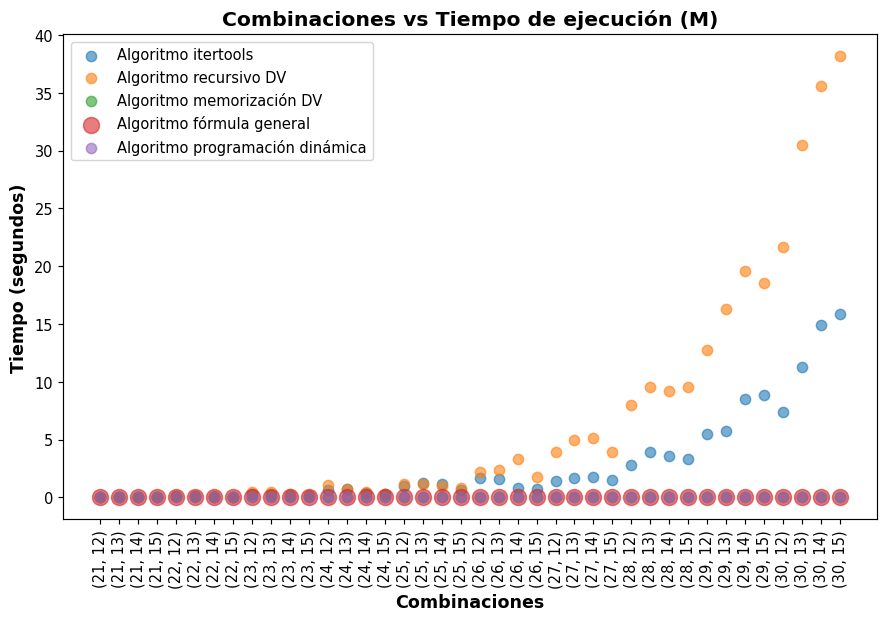

In [ ]:
compare_time_algorithms(df_itertools, df_divide_recursive, df_divide_memo, df_formule, df_dynamic_programming)

# Realizamos las pruebas de todos los algoritmos pero ahora con datos aleatorios

In [ ]:

def medir_rendimiento():
  """Funci√≥n para medir y registrar m√©tricas de rendimiento"""
  # Preparamos listas para almacenar datos
  resultados = []

  # Generamos pruebas con diferentes rangos y complejidades
  pruebas = [
    # (n_min, n_max, k_min, k_max)
    (5, 10, 1, 8),     # Rango peque√±o
    (15, 25, 9, 13 ),   # Rango medio
    (13, 28, 7, 18 ),  # Rango grande
  ]

  for n_min, n_max, k_min, k_max in pruebas:
    for _ in range(50):  # 50 pruebas por rango
      n_test = random.randint(n_min, n_max)
      k_test = random.randint(k_min, k_max)

      # Medici√≥n de tiempo para m√©todo itertools
      start_time = time.time()
      resultado_itertools = brute_force_itertools(n_test, k_test)
      tiempo_itertools = time.time() - start_time

      # Medici√≥n de tiempo para m√©todo divide y venceras recursivo
      start_time = time.time()
      resultado_dv = divide_and_conquer_recursive(n_test, k_test)
      tiempo_dv = time.time() - start_time

      # Medici√≥n de tiempo para m√©todo divide y venceras con memorizaci√≥n
      start_time = time.time()
      resultado_dv_memo = divide_memo(n_test, k_test)
      tiempo_memo = time.time() - start_time

      # Medici√≥n de tiempo para m√©todo de f√≥rmula general
      start_time = time.time()
      resultado_formula = general_formule(n_test, k_test)
      tiempo_formula = time.time() - start_time

      # Medici√≥n de tiempo para m√©todo programaci√≥n din√°mica
      start_time = time.time()
      resultado_dp = dynamic_programming(n_test, k_test)
      tiempo_dp = time.time() - start_time

      resultados.append({
        'n': n_test,
        'k': k_test,
        'resultado': resultado_dv,
        'tiempo_itertools': tiempo_itertools,
        'tiempo_dv': tiempo_dv,
        'tiempo_dv_memo': tiempo_memo,
        'tiempo_formula': tiempo_formula,
        'tiempo_dynamic_programming': tiempo_dp,
      })

  # Convertimos a DataFrame para an√°lisis
  df = pd.DataFrame(resultados)

  # Guardamos resultados en CSV
  df.to_csv('binomial_metrics.csv', index=False)

  return df

In [ ]:
def visualizar_metricas(df):
  """Funci√≥n para crear visualizaciones de las m√©tricas"""
  plt.figure(figsize=(15, 10))

  # Gr√°fico 1: Tiempo de ejecuci√≥n seg√∫n n
  plt.subplot(2, 2, 1)
  plt.scatter(df['n'], df['tiempo_itertools'], label='M√©todo itertools', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dv'], label='M√©todo divide y venceras', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dv_memo'], label='M√©todo divide y venceras con memorizaci√≥n', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_formula'], label='M√©todo f√≥rmula general', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dynamic_programming'], label='M√©todo programaci√≥n din√°mica', alpha=0.6)
  plt.title('Tiempo de Ejecuci√≥n vs Tama√±o de n')
  plt.xlabel('n')
  plt.ylabel('Tiempo (segundos)')
  plt.legend()

  # Gr√°fico 2: Distribuci√≥n de tiempos
  plt.subplot(2, 2, 2)
  sns.boxplot(data=[df['tiempo_itertools'], df['tiempo_dv'], df['tiempo_dv_memo'], df['tiempo_formula'], df['tiempo_dynamic_programming']])
  plt.title('Distribuci√≥n de Tiempos de Ejecuci√≥n')
  plt.xticks([0, 1, 2, 3, 4], ['Itertools', 'DV', 'DV_memo','formula', 'dynamic_programming'])
  plt.ylabel('Tiempo (segundos)')

  # Gr√°fico 3: Relaci√≥n entre n, k y tiempo
  plt.subplot(2, 2, 3)
  sc = plt.scatter(df['n'], df['k'], c=df['tiempo_dv'], cmap='viridis')
  plt.colorbar(sc, label='Tiempo (dv)')
  plt.title('Complejidad: n, k y Tiempo')
  plt.xlabel('n')
  plt.ylabel('k')

  # Gr√°fico 4: Comparaci√≥n de m√©todos
  plt.subplot(2, 2, 4)
  speed_up = df['tiempo_dv'] / df['tiempo_dv_memo']
  plt.hist(speed_up, bins=20, edgecolor='black')
  plt.title('Speed-up (dv vs dv memo)')
  plt.xlabel('Tiempo dv / Tiempo dv_memo')
  plt.ylabel('Frecuencia')

  plt.tight_layout()
  plt.show


In [ ]:
data = medir_rendimiento()

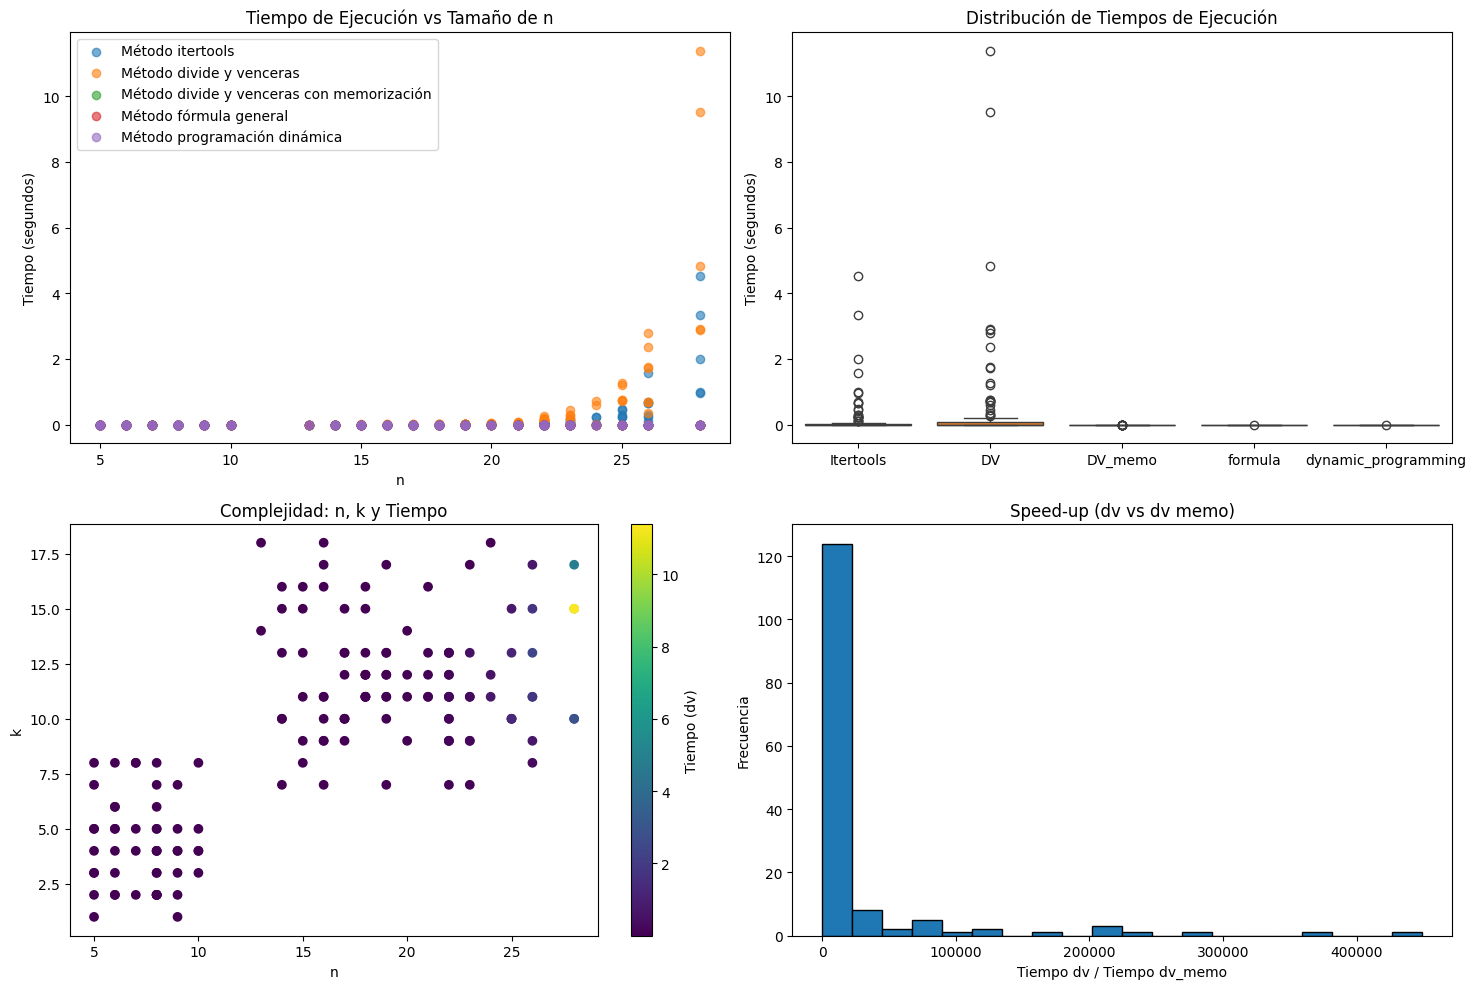

In [ ]:
visualizar_metricas(data)

# Comparaci√≥n de Eficiencia entre Algoritmos para Coeficientes Binomiales

## Comparaci√≥n de Implementaciones para el C√°lculo de Coeficientes Binomiales

Al comparar las diferentes implementaciones para el c√°lculo de coeficientes binomiales, podemos establecer la siguiente **jerarqu√≠a de eficiencia**:

---

### üßÆ Algoritmo Recursivo Puro

- **Complejidad Temporal:** $\mathcal{O}(2^n)$ ‚Äî Exponencial  
- **Complejidad Espacial:** $\mathcal{O}(n)$ ‚Äî Lineal  
- **Eficiencia:** La menos eficiente de todas las implementaciones  
- **Limitaciones:** Solo viable para valores muy peque√±os de $n$ ($n < 20$)  
- **Ventajas:** Implementaci√≥n intuitiva y directa del concepto matem√°tico

---

### üîÅ Algoritmo Recursivo con Memoizaci√≥n

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ ‚Äî Polin√≥mica  
- **Complejidad Espacial:** $\mathcal{O}(n \cdot k)$ ‚Äî Polin√≥mica  
- **Eficiencia:** Mejora dr√°stica respecto al recursivo puro  
- **Limitaciones:** Requiere espacio adicional para almacenar resultados intermedios  
- **Ventajas:** Mantiene la claridad del enfoque recursivo eliminando c√°lculos redundantes

---

### ‚ú≥Ô∏è Algoritmo con F√≥rmula Factorial

- **Complejidad Temporal:** $\mathcal{O}(n)$ ‚Äî Lineal  
- **Complejidad Espacial:** $\mathcal{O}(1)$ ‚Äî Constante  
- **Eficiencia:** Excelente para valores peque√±os y medianos  
- **Limitaciones:** Susceptible a **desbordamientos aritm√©ticos** para $n$ moderadamente grandes  
- **Ventajas:** Implementaci√≥n extremadamente concisa y uso m√≠nimo de memoria

---

### üß© Programaci√≥n Din√°mica Bidimensional

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ ‚Äî Polin√≥mica  
- **Complejidad Espacial:** $\mathcal{O}(n \cdot k)$ ‚Äî Polin√≥mica  
- **Eficiencia:** Buena eficiencia temporal y f√°cil de entender  
- **Limitaciones:** Mayor consumo de memoria que otras alternativas optimizadas  
- **Ventajas:** Claridad conceptual y acceso a toda la tabla de valores intermedios

---

### üìà Programaci√≥n Din√°mica Unidimensional

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ ‚Äî Polin√≥mica  
- **Complejidad Espacial:** $\mathcal{O}(k)$ ‚Äî Lineal en $k$  
- **Eficiencia:** La **mejor relaci√≥n eficiencia-memoria**  
- **Limitaciones:** Ligeramente m√°s compleja de implementar  
- **Ventajas:** Estabilidad num√©rica, manejo de valores grandes y uso √≥ptimo de memoria

---

## ‚úÖ Conclusi√≥n sobre Eficiencia

Para **aplicaciones pr√°cticas**, la **programaci√≥n din√°mica unidimensional** ofrece el **mejor equilibrio** entre eficiencia computacional y uso de memoria, siendo capaz de manejar valores grandes de $n$ y $k$ sin problemas de desbordamiento.

El **m√©todo factorial** es preferible para valores **peque√±os** debido a su simplicidad y velocidad,  
mientras que los enfoques **recursivos puro y con memoizaci√≥n** sirven principalmente como **ilustraciones did√°cticas** de la evoluci√≥n algor√≠tmica.

---

La **elecci√≥n √≥ptima** depender√° del contexto espec√≠fico de aplicaci√≥n, los rangos t√≠picos de valores de entrada,  
y las restricciones de memoria del sistema. Para **c√°lculos intensivos** o aplicaciones que requieren **alta escalabilidad**,  
las implementaciones de **programaci√≥n din√°mica optimizadas** (especialmente la versi√≥n **unidimensional**) son claramente superiores.


# Conclusi√≥n sobre Algoritmos para el C√°lculo de Coeficientes Binomiales

### Conclusiones sobre la Eficiencia en el C√°lculo de Coeficientes Binomiales

---

Tras analizar diferentes implementaciones para el c√°lculo de coeficientes binomiales, podemos extraer importantes conclusiones sobre la **eficiencia algor√≠tmica** y sus implicaciones pr√°cticas.

Los algoritmos estudiados representan un claro ejemplo de c√≥mo diferentes estrategias de programaci√≥n pueden afectar dr√°sticamente el **rendimiento computacional** al resolver un mismo problema:

- La **implementaci√≥n recursiva pura** exhibe una complejidad temporal **exponencial**:  
  $\mathcal{O}(2^n)$ en tiempo y $\mathcal{O}(n)$ en espacio,  
  lo que la hace impr√°ctica para valores moderadamente grandes.

- En contraste, la incorporaci√≥n de t√©cnicas de **memoizaci√≥n** transforma la complejidad a:  
  $\mathcal{O}(n \cdot k)$ tanto en **tiempo** como en **espacio**,  
  permitiendo manejar entradas considerablemente mayores.

- El enfoque de **programaci√≥n din√°mica bidimensional**, aunque mantiene la misma complejidad temporal $\mathcal{O}(n \cdot k)$,  
  **utiliza m√°s memoria** que su contraparte unidimensional.

- Por otro lado, el m√©todo basado en **factoriales** ofrece una implementaci√≥n concisa con complejidad temporal $\mathcal{O}(n)$,  
  pero **sufre limitaciones pr√°cticas** debido a posibles **desbordamientos aritm√©ticos**.

Esta progresi√≥n de algoritmos ilustra perfectamente el cl√°sico **compromiso entre tiempo y espacio** en la ciencia de la computaci√≥n,  
as√≠ como la importancia de seleccionar la implementaci√≥n adecuada seg√∫n el contexto de aplicaci√≥n:

- Para entradas **peque√±as**, la **simplicidad del enfoque factorial** puede ser preferible.  
- Para c√°lculos con **valores grandes**, las implementaciones de **programaci√≥n din√°mica optimizadas** resultan indispensables.

---

### Reflexi√≥n Final

El estudio de estos algoritmos no solo proporciona soluciones eficientes para el c√°lculo de coeficientes binomiales,  
sino que tambi√©n demuestra **principios fundamentales del dise√±o de algoritmos**:

- Identificaci√≥n de **subproblemas**  
- Eliminaci√≥n de **c√°lculos redundantes**  
- Optimizaci√≥n de **recursos computacionales**
